## Tarea 11

## Ejercicio 1

In [7]:
using Plots
Plotly()

LoadError: [91mUndefVarError: Plotly not defined[39m

In [8]:
function MetodoEuler(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    listt=to:h:t
    listx=[xo]
    for i in 1:length(listt)-1
    xo=xo+h*f(Float64(xo),listt[i])
        push!(listx,xo)
    end
    return listt,listx
end
        
    

MetodoEuler (generic function with 1 method)

In [9]:
f(x,t)=-2.5x

f (generic function with 1 method)

Primero haré las gráficas para la condicion inicial $x(0)=1$

In [10]:
h1=MetodoEuler(f,1.0,0.0,8.0,0.5)
h2=MetodoEuler(f,1.0,0.0,8.0,0.2)
h3=MetodoEuler(f,1.0,0.0,8.0,0.01)
h0=MetodoEuler(f,1.0,0.0,8.0,1.0)
hExacta(t)=e^(-2.5*t)

hExacta (generic function with 1 method)


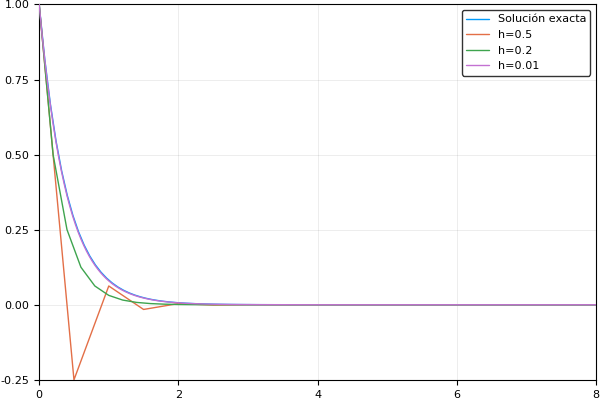

In [11]:
plot(linspace(0,8,100),hExacta,label="Solución exacta")
plot!(h1,label="h=0.5")
plot!(h2,label="h=0.2")
plot!(h3,label="h=0.01")


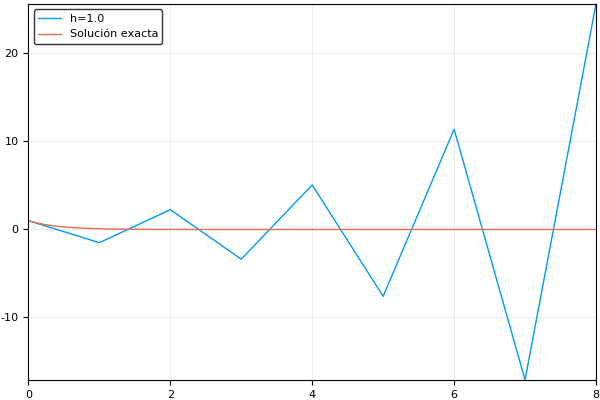

In [6]:
plot(h0,label="h=1.0")
plot!(linspace(0,8,100),hExacta,label="Solución exacta")

Se puede observar notoriamente que conforme h es más pequeña el método converge a la solución exacta. Ahora graficaremos para la condicion inicial $x(0)=2$

In [12]:
h1=MetodoEuler(f,2.0,0.0,8.0,0.5)
h2=MetodoEuler(f,2.0,0.0,8.0,0.2)
h3=MetodoEuler(f,2.0,0.0,8.0,0.01)
h0=MetodoEuler(f,2.0,0.0,8.0,1.0)
hExacta(t)=2*e^(-2.5*t)

hExacta (generic function with 1 method)


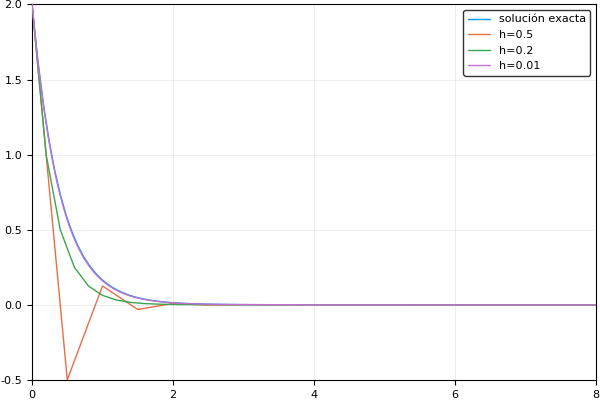

In [13]:
plot(linspace(0,8,100),hExacta,label="solución exacta")
plot!(h1,label="h=0.5")
plot!(h2,label="h=0.2")
plot!(h3,label="h=0.01")


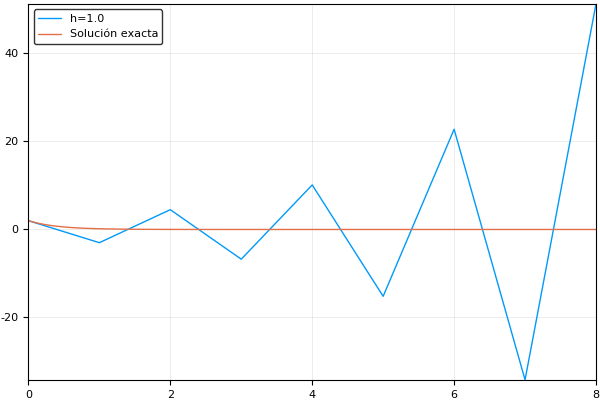

In [14]:
plot(h0,label="h=1.0")
plot!(linspace(0,8,100),hExacta,label="Solución exacta")

No es coincidencia que las gráaficas sean identicas al caso pasado, lo que pasa es que la solución exacta de la nueva condicion inicial es la misma multiplicada por una constante en este caso 2, por lo que la gráfica es la misma con un cambio de escala en todos los casos. 

## Ejercicio 2

Vamos a resolver $\ddot{x} =
-kx$, esta ecuación la hemos visto muchas veces, se puede resolver usando la ecuación característica pero nosotros ya sabemos que la solución es una combinacion lineal de seno y coseno o de exponenciales complejas. Es decir, la solución es $$x(t)=Acos(\sqrt{k}t)+Bsin(\sqrt{k}t)$$

luego evaluando en las condiciones iniciales $x(0), x'(0)$

$$x(t)=x(0)cos(\sqrt{k}t)+\frac{x'(0)}{\sqrt{k}}sin(\sqrt{k}t)$$

## Ejercicio 3

Ahora harémos el cambio $u=\dot{x}$ y calculando su derivada tenemos
\begin{align}
\dot{u}&=\ddot{x}\\
&=-kx
\end{align}

Y terminamos con un sistema de ecuaciones como el que sigue 
$$\dot{u}=-kx$$
$$\dot{x}=u$$

## Ejercicio 4
Lo que se tiene que hacer al ser un sistema acomplado es utilizar el método de Euler pero como las ecuaciones son dependientes una de otra, en cada paso meteremos la solucion de la primera ecuacion diferencial en la segunda y así se dará cada paso. 

Intenté hacerlo vectorial pero no pude hacer que aceptara como argumentos vectores mi función. De cualquier manera se puede definir la función con más parametros y hacerlo como si fuera un sistema de ecuaciones sin vectores. :)

In [15]:
g(x,t)=-x
f(u,t)=u
function MetodoEuler_2D(f,g,xo,uo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    listt=to:h:t
    listx=[xo]
    listu=[uo]
    for i in 1:length(listt)-1
    uo=uo+h*g(Float64(xo),listt[i])  
    xo=xo+h*f(Float64(uo),listt[i]) 
        push!(listx,xo)
        push!(listu,uo)
    end
    return listt,listx
end
        

MetodoEuler_2D (generic function with 1 method)

A continuacion correré un test para el caso k=1, con condiciones iniciales $x(0)=0,u(0)=1$ pues tiene como solución una función exacta $x(t)=sin(t)$

In [16]:
h0=MetodoEuler_2D(f,g,0.0,1.0,0.0,2*pi,1)
h1=MetodoEuler_2D(f,g,0.0,1.0,0.0,2*pi,0.5)
h2=MetodoEuler_2D(f,g,0.0,1.0,0.0,2*pi,0.1)
solucionexacta(t)=sin(t)

solucionexacta (generic function with 1 method)


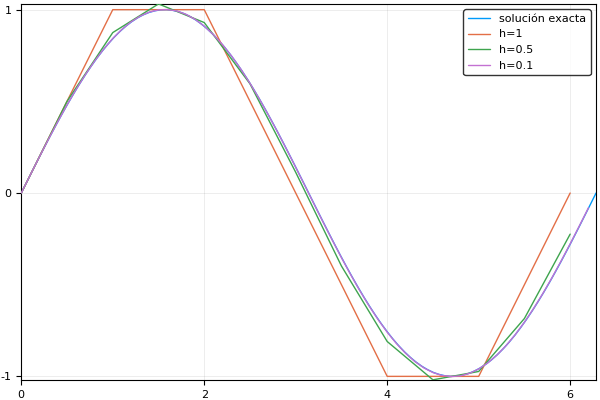

In [17]:
plot(linspace(0,2*pi,100),solucionexacta,label="solución exacta")

plot!(h0,label="h=1")
plot!(h1,label="h=0.5")
plot!(h2,label="h=0.1")

Se puede ver que para $h=0.1$la solución numerica queda prácticamente sobre la curva de la solución exacta, esto quiere decir, que se puede aplicar el método de Euler para resolver ecuaciones diferenciales de segundo orden y que también aumenta la convergencia del método a la solución exacta conforme h e más pequeña.

## Ejercicio 5

In [18]:
f(x,t)=(2x-18t)/(1+t)

s(t)=4+8*t-5t^2

s (generic function with 1 method)

In [19]:
h1=MetodoEuler(f,4.0,0.0,20.0,0.01)

(0.0:0.01:20.0, [4.0, 4.08, 4.15901, 4.23703, 4.31406, 4.3901, 4.46515, 4.53921, 4.61228, 4.68436  …  -1798.15, -1800.04, -1801.93, -1803.83, -1805.72, -1807.62, -1809.51, -1811.41, -1813.31, -1815.21])


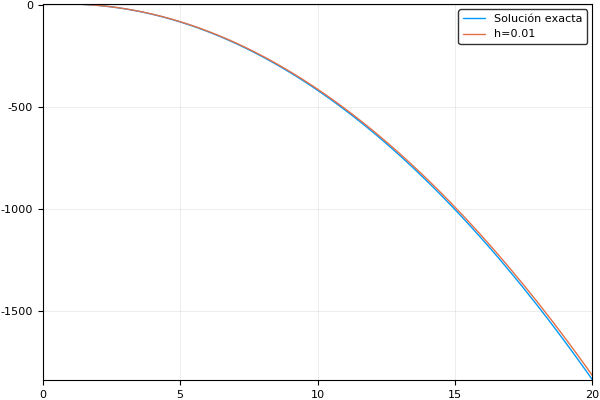

In [20]:
plot(linspace(1,20,100),s,label="Solución exacta")
plot!(h1,label="h=0.01")

Nuestro programa calcula a buena aproximación la curva que resuelva la ecuación diferencial. :)